# 🤩 Cell-Type Proportion Exploration


In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.14


In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

### Investigate cell-type composition within the ROI's

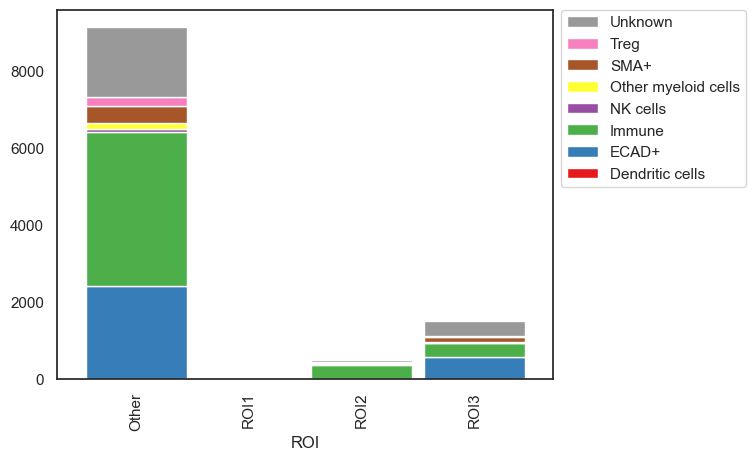

In [3]:
# plots the absolute count of cells within each ROI
sm.pl.stacked_barplot (adata,
                       x_axis='ROI',
                       y_axis='phenotype',
                       method='absolute')

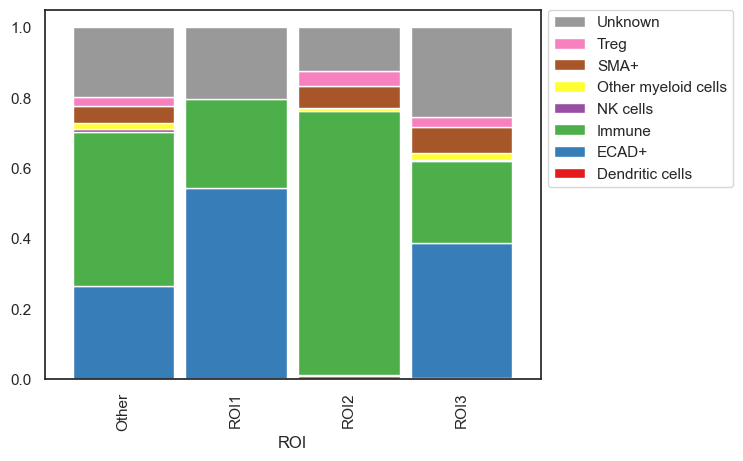

In [4]:
# Plot the number of cells normalized to 100% 
sm.pl.stacked_barplot (adata,
                       x_axis='ROI',
                       y_axis='phenotype',
                       method='percent')

The `stacked_barplot` function offers numerous additional parameters for customization. For further details, consult the documentation. For instance, it allows for plotting specific cell types, defining custom orders for both the x and y axes, passing custom color schemes, and more.

### Compute the fold change in cell types across various ROIs.

In [5]:
adata = sm.tl.foldchange (adata, 
                          from_group=['ROI1'], 
                          to_group=None, 
                          imageid='ROI', 
                          phenotype='phenotype',
                          normalize=True, 
                          subset_phenotype=None, 
                          label='foldchange')

calculating foldchange
calculating P values


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/foldchange.py:110: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', ..., 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1']
Length: 59
Categories (1, object): ['ROI1']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/foldchange.py:111: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Immune', 'ECAD+', 'Immune', 'Immune', 'Immune', ..., 'Unknown', 'Unknown', 'ECAD+', 'ECAD+', 'ECAD+']
Length: 59
Categories (3, object): ['ECAD+', 'Immune', 'Unknown']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/foldchange.py:1

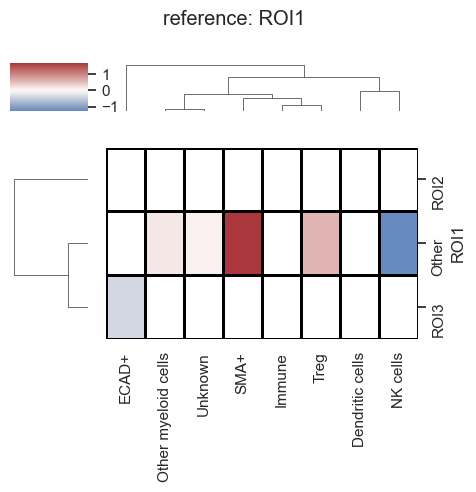

In [6]:
# Now let's plot the results

sm.pl.foldchange (adata, label='foldchange', method='heatmap', p_val=0.05, nonsig_color='grey', figsize=(5,5),
                  log=True, center=0, linecolor='black',linewidths=1)

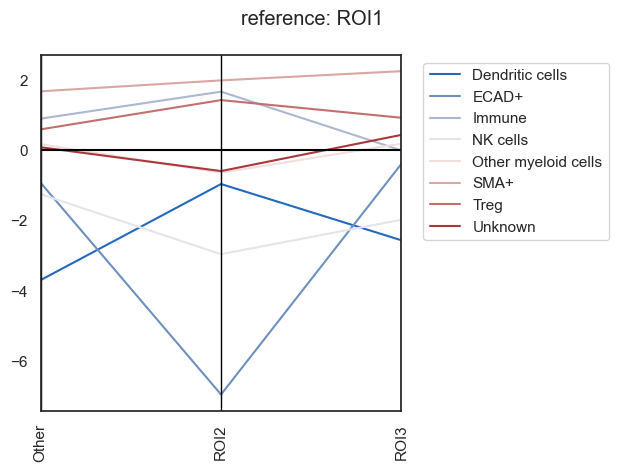

In [7]:
# lets plot the same results differently (this would be more useful when you have more groups to compare)

# Parallel_coordinates plot of the foldchanges
sm.pl.foldchange (adata, label='foldchange', 
                log=True, method='parallel_coordinates', 
                invert_axis=True,
                xticks_rotation=90,
                return_data = False)

### Exploring the phenotypes overlaid on a UMAP

In [8]:
# view the phenotype on a UMAP
adata = sm.tl.umap(adata)

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/umap.py:290: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



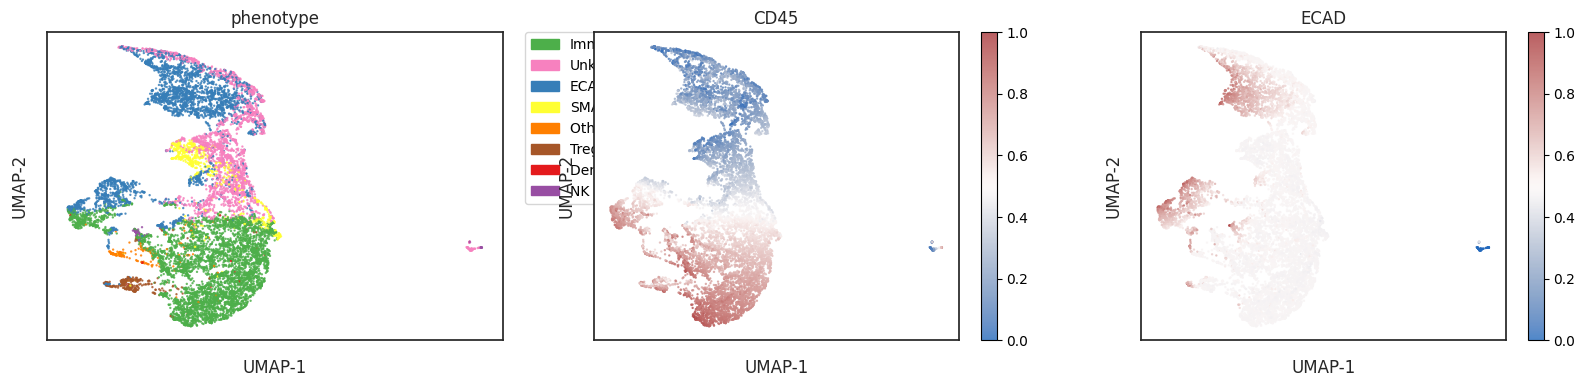

In [9]:
sm.pl.umap(adata, color=['ECAD', 'CD45', 'phenotype'], s=0.5, figsize=(20, 4))

### Exploring the expression of markers with phenotypes

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/heatmap.py:312: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



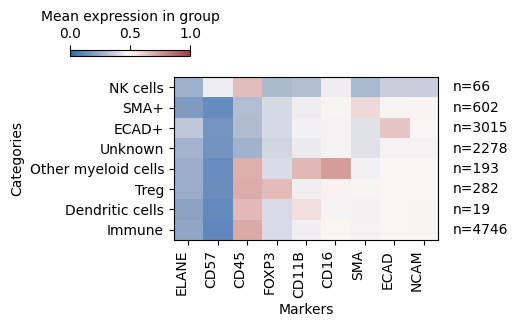

In [10]:
# Heatmap (here values over 0.5 are considered positive as we have scaled the data)
sm.pl.heatmap(adata, groupBy='phenotype', standardScale=None, figsize=(6,3), showPrevalence=True, vmin=0, vmax=1)

### Exploring the correlation of markers

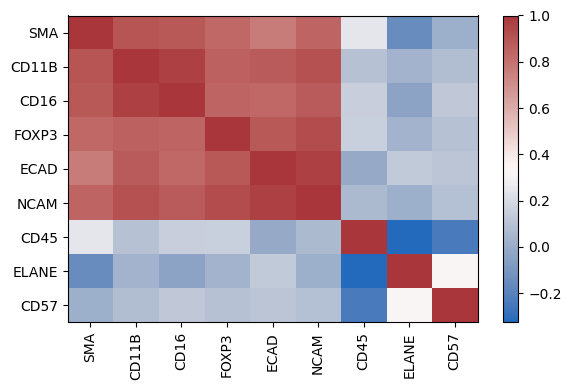

In [13]:
sm.pl.markerCorrelation(adata, figsize=(6,4))

### Exploring the correlation of abundance of cell types between conditions

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/groupCorrelation.py:127: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



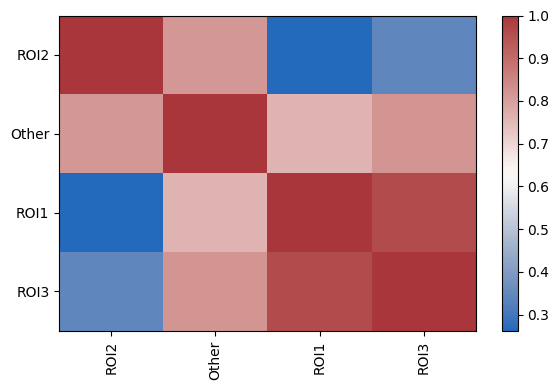

In [15]:
sm.pl.groupCorrelation(adata, groupBy='ROI', condition='phenotype', figsize=(6,4))

### Save Results

In [16]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')